# Bioinformatics Problems

## Using OOP for a DNASequence Class 

In [7]:
from Classes import DNASequence
from Bioinformatics_Functions import random_sequence

s1 = random_sequence(100)
s2 = random_sequence(500)

seq1 = DNASequence(s1)
seq2 = DNASequence(s2)

print(f"Sequence: {s1}")
print(f"Length: {len(seq1)}")
print(f"Nucleotide counts: {seq1.nuc_count()}")
print(f"Reverse compliment sequence: {seq1.rev_comp()}")
print(f"\nSequence: {s2}")
print(f"Length: {len(seq2)}")
print(f"Nucleotide counts: {seq2.nuc_count()}")
print(f"Reverse compliment sequence: {seq2.rev_comp()}")

Sequence: TGAACCCGACCTCTCTGGTTCCTCTTAGTGAAGAGCAGCAAATCATGCCGCACAGGAATCGGGATCGTCGAACTTCCTGGCAACATCAGCGGACTTCGTC
Length: 100
Nucleotide counts: {'A': 24, 'C': 30, 'G': 24, 'T': 22}
Reverse compliment sequence: GACGAAGTCCGCTGATGTTGCCAGGAAGTTCGACGATCCCGATTCCTGTGCGGCATGATTTGCTGCTCTTCACTAAGAGGAACCAGAGAGGTCGGGTTCA

Sequence: CTTTGTAACTCTGTTTTAATAGCTATCCCGCAACATTTACCTCGCACAAGAACATGACGACTATAACATAGCGGAAGCTCTTATATGATCGCCGGAGGGCTCAACTCATCCACGTAGTTTGGCCCCTATGATTACAGGAGTCTGAATAGGCCCCAACTGGAGTCTCAAAGACACCGCATAAAGTCAATACAAGGAGTGGCCGTCTTATCGCCTGAACCGCTATCCAATTCTACTCGCGAATGTGTAGGTTCTACCCACCCAACAAGGATCGATGTACGGTTTGCGCGGGTGGTATGGGAGTGCTAGCTATCCACCGTCCGCCAGACCTTTGTAACACCTTCCGGCAGCGATCCCACGCGTGCGGGGGTGATTCCAAGACCTCCAAGGTGTACTGTGCAGGTTCGCGTATCGTGTGGCTCATAGCGTACTTAGGAACGCCCGATCAGATGGCCTTATTACACATTAATGATGTTAGGTTTAACCTCCTTACTAGCGGATAC
Length: 500
Nucleotide counts: {'A': 124, 'C': 133, 'G': 117, 'T': 126}
Reverse compliment sequence: GTATCCGCTAGTAAGGAGGTTAAACCTAACATCATTAATGTGTAATAAGGCCATCTGATCGGGCGTTCCTAAGTACGC

## Handling some NGS data

In [34]:
# Reading a .fa file and counting the nucleotides

from NGS_Functions import FASTA_read
from Bioinformatics_Functions import nucleotide_count


genome = FASTA_read('lambda_virus.fa')
print(genome[:50], "...")
nucleotide_count(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAA ...


{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}

In [10]:
# Reading a .fastq file

from NGS_Functions import FASTQ_read

seqs, quals = FASTQ_read('ERR037900_1.first1000.fastq')
print(seqs[:5])
print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']
['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFH

In [11]:
# Getting Q values

from NGS_Functions import Phred33_to_Q

# Q values for first sequence
vals1 = ','.join(str(Phred33_to_Q(val)) for val in quals[0])
print(vals1)

39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,38,37,39,39,39,37,39,37,37,39,39,39,39,39,38,39,39,37,39,36,39,31,19,2,20,20,20,20,19,19,20,20,39,38,37,33,37,27,31,34,29,22,36,36,37,31,37,33,36,35,35,35,27,28,34,27,36


[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


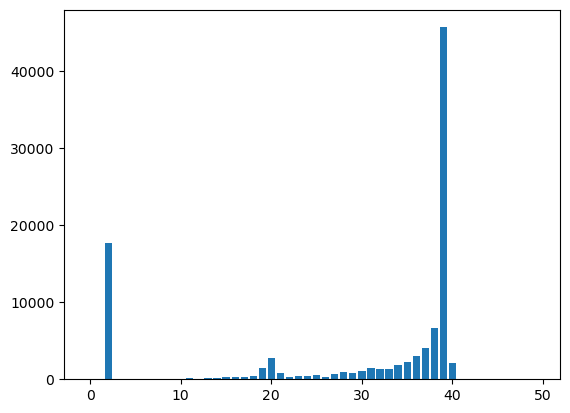

In [12]:
# Plotting a histogram of Q values

from NGS_Functions import hist
import matplotlib.pyplot as plt

h = hist(quals)
print(h)
plt.bar(range(len(h)), h)
plt.show()

### Matching reads with Naive Exact Matching algorithm

In [13]:
from Bioinformatics_Functions import random_sequence
from NGS_Functions import naive


genome = random_sequence(5000)
pattern = 'ACGT'
print(f"Indices where {pattern} matches against genome: {naive(pattern, genome)}")

Indices where ACGT matches against genome: [597, 685, 734, 1339, 1350, 1461, 1486, 1811, 2079, 2473, 2591, 2715, 2929, 3106, 3383, 3447, 3556, 3628, 3648, 3848, 4733, 4868]


In [38]:
phix_reads, _ = FASTQ_read('lambda_virus.fa')

matched_reads = 0
tot_reads = 0
for read in phix_reads:
    matches = naive(read, genome)
    tot_reads += 1
    if len(matches) > 0:
        matched_reads += 1

print(f"Reads matched in genome: {matched_reads} / {tot_reads}")

Reads matched in genome: 174 / 174


### Getting the number of each nucleotide in *Vibrio cholerae*:

In [14]:
file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\Vibrio_cholerae_genome_seq.txt'

with open(file_path, 'r') as f:
    seq = f.readline()
    
print(nucleotide_count(seq))

{'A': 293942, 'C': 263573, 'G': 256024, 'T': 294711}


### Counting pattern occurrences in a sequence:

In [15]:
from Bioinformatics_Functions import pattern_count


file = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30272_6.txt'
with open(file, 'r') as f:
    # Read the first line and assign it to the variable 'Seq'
    Seq = f.readline().strip()
    # Read the second line and assign it to the variable 'pattern'
    Pattern = f.readline().strip()
    
print("Seq:", Seq)
print("Pattern:", Pattern)
print(f"Occurrences of 'TTATCCATT' in Vibrio cholerae: {pattern_count(Seq, Pattern)}")

Seq: TAGAGATTATCCAATTATCCACCGTTATCCAATTTATCCACATTATCCATTTATCCAGTTATCCACTTATCCAGTTATCCATTGATTATCCATTATCCAGTCTTATCCATTTATCCATTATCCATTATCCATTATCCATTATCCATTATCCATTATCCAATTTATCCATTATCCAGGAACACCGGCAATGCCAGTTATCCAGATTATCCATTATCCATTATCCAACCGATTATCCAGCTTATCCACTGCCGTACATGATTATCCATTATCCAAATACAGTTATCCATAATTATCCAGGGTATTTATCCATTATCCAACTTATCCATTTATCCATTATCCATATTATCCAGGCACGCGTTATCCAGAGTGACTTGTTATCCATTTTATCCACATTATCCACAATAGTATTTATCCATTATCCAAAGCGCGTTATCCAAGTTATCCATTATCCATTATCCACCAACATTATCCAGATTATCCATGTGTTATCCAGTTATCCAGAGTTATCCAACACTTATCCACTTATCCATTTATCCATTATCCACCCATTATCCATTATCCACTGTCCTTATCCATGTTATCCACATTATCCATTTATCCATTATCCAGCTTTATCCACATCTTTATCCATTATCCAGACCATTATCCATGCTTATCCAAGGATCTTATCCACGAAGTTATCCATATACATTCAACGTTATCCACATAATTTATCCATTATCCATTATCCAACTTATCCAGTTATCCACTTATCCAGGCTTATCCAACCTTTATCCATTATCCAAGTCTTATCCATACTTATCCATTATCCACTTATCCATATTATCCACCCGTTATCCACGGTTATCCAGTTATCCACTTATCCAATTATCCATTATCCATTTATCCATTCTTTTATCCACTTTATCCACATGAGTATTTTATCCACGTTATCCAAGTTATCCATTTTATCCATTATCCATTATCCATTATCCACTCTTATCCACCGATTATCC

### Counting the most frequent pattern occurrences (k-mers of length 2, 3, etc.) in a sequence:

In [16]:
from Bioinformatics_Functions import freq_map, most_freq_patterns


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30272_13.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()

# Get the most frequent patterns
freqPatterns = most_freq_patterns(Seq, K)
print("Most Frequent Patterns:", freqPatterns)

# Get the frequency map
freqMap = freq_map(Seq, K)

print(f"Frequency Map: ")
[print(f"{key}:{value}") for key, value in list(freqMap.items())[:10]]
print(".\n.\n.")

Most Frequent Patterns: ['TACGTTTTGGATAG', 'ACGTTTTGGATAGT']
Frequency Map: 
ATTTGGCATTTGGC:8
TTTGGCATTTGGCA:4
TTGGCATTTGGCAT:4
TGGCATTTGGCATT:4
GGCATTTGGCATTT:4
GCATTTGGCATTTG:4
CATTTGGCATTTGG:4
TTTGGCATTTGGCT:3
TTGGCATTTGGCTA:2
TGGCATTTGGCTAC:2
.
.
.


### Finding the compliment of a sequence and reversing it:

In [17]:
from Bioinformatics_Functions import reverse_complement


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30273_2.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()

rev_comp_seq = reverse_complement(Seq)
print("Original Sequence: ", Seq[:10], "...", Seq[-10:], sep='')
print("\nReversed Complementary Sequence: ", rev_comp_seq[:10], "...", rev_comp_seq[-10:], sep='')

Original Sequence: ACCTCAGGTT...GATAACCTTC

Reversed Complementary Sequence: GAAGGTTATC...AACCTGAGGT


### Finding all occurrences of CTTGATCAT in the *Vibrio cholerae* genome:

In [18]:
from Bioinformatics_Functions import find_pattern_indices


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\Vibrio_cholerae.txt'
with open(file_path, 'r') as file:
    # Pattern = file.readline().strip()
    Seq = file.readline().strip()

Pattern = 'CTTGATCAT'

result = find_pattern_indices(Seq, Pattern)
print(f"The pattern '{Pattern}' occurs at indices:\n{result}")

The pattern 'CTTGATCAT' occurs at indices:
60039 98409 129189 152283 152354 152411 163207 197028 200160 357976 376771 392723 532935 600085 622755 1065555


### Find a k-mer pattern forming a 'clump' in a sequence:
 - ### *Clump(L, t)* denotes a pattern being found *t* times within *L* nucleotides
 - ### e.g. (50,4)-clump: find all k-mers occuring *t* = 4 times within an *L* = 50 nucleotide section

In [19]:
from Bioinformatics_Functions import find_clumps


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30274_5.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    k, L, t = file.readline().strip().split()

result = find_clumps(Seq, k, L, t)
print(f"{k}-mers occurring at least {t} times in {L}-long segments: {result}")

6-mers occurring at least 3 times in 200-long segments: AACCTG ACCTGG CCTGGG CTGGGA TGGGAA GGGAAC GGAACC GAACCT CCTGGA CTGGAA TGGAAC CTGGGT TGGGTT GGGTTC GTTTCG TTTCGA TTCGAA TTCCCC CCTAGA CCCCCC CCCCCA CCCCAT CCCATT CCATTG CATTGC ATTGCG TTGCGC TTGCGT ACCCCC GCTGCG TGCGCT GCGCTG TGGCTG GTTGGT TTGGTG CTTGTT TTGTTG TGTTGG TGGTGT CCCCCT CCCCTT TTCTTG TCTTGT TGTTGC GTTGCT GCGCGC CGCGCG AGCGGT GCCCTG CCTGGC CTGGCT CGCGAG GCGAGC CGAGCG GAGCGG GCGGTG GGTGAC GCGCGA GCGGTT CGGTTC TCGCGA GTGGAC GGTGGT GCTGCT TACCTA ACCTAA CCTAAA CTAAAG TAAAGT GCGTAC AGTTTA TTACCT AAAGTA GTACCT AAAGTC AAAGTT AAGTTT AGTAGT AGTCGC ACGGAG TCTGGT CGTTAC GTTACA CCGTTA TCTAAA ACGTCA CTGAAC ATTGAC TTGACG CTCACC TCATGT GTCCAG GATACC ATACCA CCAGGG TCCAGA CCAGAT CAGATA AGATAC ATACCG TCTCGA AGTCCA CTCCAG ATACCC CCCGCA GGGCCG GGCCGC CCGCAG CGCAGT GCAGTC CAGTCC GACGGG ACGGGC TGTGTT GTGTTA TGTTAC GTTACT TTACTG TACTGC ACTGCA TGCACT GCACTG CTGCAC CACTGG CTGTTA CTGCAT AGCTCG GGGACG GGTATT CGGGCT ACACCC CACCCA ACCCAA CCCAAA CCAAAC

### How many different 9-mers form (500,3)-clumps in the E. coli genome?

In [20]:
from Bioinformatics_Functions import find_clumps_V2


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\E_coli.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    
k = 9
L = 500
t = 3

result = find_clumps_V2(Seq, k, L, t)
print(f"Total number of {k}-mers that form (500, 3)-Clumps: {len(result)}")
print(f"{k}-mers occurring in (500, 3)-Clumps in E-coli:\n{result[:10]}...")

Total number of 9-mers that form (500, 3)-Clumps: 1904
9-mers occurring in (500, 3)-Clumps in E-coli:
['TGGAACAGC', 'CGGGCTCAT', 'TCCGGCAAT', 'CGACCTGTA', 'GGTTGCCTG', 'ACGCTTAAC', 'ACGCGACTT', 'TAAGGCGTT', 'GTTCACGCC', 'CCTACGGGG']...


Minimum skew positions (indices): [53976, 53977]


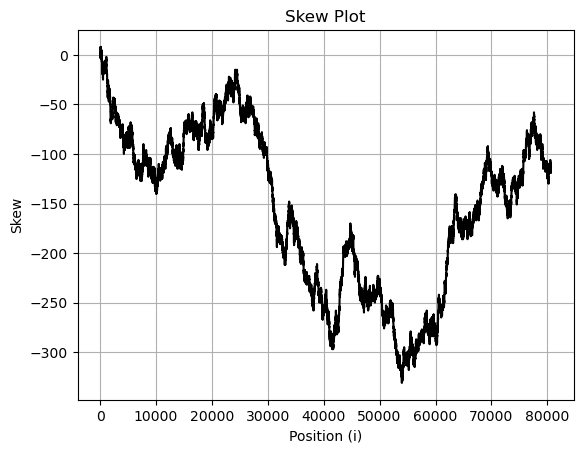

In [21]:
from Bioinformatics_Functions import skew, min_skew_positions, plot_skew


file = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30277_10.txt'
with open(file, 'r') as f:
    Genome = f.readline().strip()

min_positions = min_skew_positions(Genome)
print(f"Minimum skew positions (indices): {min_positions}")
plot_skew(Genome)

### Plotting the results of the skew function

In [22]:
from Bioinformatics_Functions import hamming_distance_V2


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_3.txt'
with open(file_path, 'r') as file:
    Seq1 = file.readline().strip()
    Seq2 = file.readline().strip()

print(f"Hamming distance / number of mismatches between sequence 1 and 2: {hamming_distance_V2(Seq1, Seq2)}\n", f"Sequence 1:\n", Seq1, f"\nSequence 2:\n", Seq2, "\n", sep='')

Hamming distance / number of mismatches between sequence 1 and 2: 902
Sequence 1:
TAGCTTTCCAACTCTCTCAAGAACGGCCATGGGTATTTACGTGCCGCAGCCTGGATCAGTATAACACCACAATGGCAGTGATGTGTAGTCTCCGACATCAACTCCATACCGGCGGTTCGTCGTCTTCAAGGTGTCTCCTCGTCGTCAACCTCTCCTTCGGTGCTCTGACGCCCAGTAGAGATCTCAGGCCACATAAGGGGGCTGGAAAGTCAGTCGAAATTACTATTCCTGCCCCGAGACTCCCCCGATTATTCCTGGCTATGTGTTTGGACCGTCGGTACACGTCACATTCTTCCGCACCTGGGCCAGGACATGATGTAGCATATTTAGACTAAGGAGAGATAGTTTTGTCGCCGCCTGGAAAACAACTTCGTATACGCGGGGAAAGTCAAGAGCTCTCCAGGGAACCATATGGGCCTCTAGTGTTTAACGAGGGGGGGATACTGTATATCGTCACTGAACAATACACTACGTTTAACTCTGAGTACAATCCTGTCATATGCCTCCCTAACGGTTGGAGCTAAAATGATTCTCGTGGCGGACGTTCGATTCTCATGAGGGTATGTCGGTCAAGAAGAATATTGATGGTTACTAATCTGTCGCGAAATGCTAGTAGATACGGTCGATGCCTTAGGATCACTGCATCCTCGCTGAACCCTTAATTTGTTAGCAGCGGAGAACTCTAGGTTAGCAGGGGCGTCCCCAAAGTTCAAGGGTTCGCAGGCGAAGCATAATTCTCGGACGAAGTTTCATTTTGGTATGTCGCGATGGGTTTCCGGTGCTTTGCACGACAGCAGCAGAAGAAATACAAAGGTAGCCGACAAGCGGAACATGTATGAAACGAAGTGACAGGACACCAAGCCATCGGACCCGAACGTTCTGATCCAGCGGAGATATGTATGTGATGTCTCTGCCCTT

In [23]:
from Bioinformatics_Functions import approx_pattern_occurrences


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_4.txt'
with open(file_path, 'r') as file:
    Pattern = file.readline().strip()
    Seq = file.readline().strip()
    D = file.readline().strip()

print(f"Locations (indices) of {Pattern} with {D} or fewer mismatches:\n", approx_pattern_occurrences(Pattern, Seq, D)[:20], "...", sep='')

Locations (indices) of CATTACTGT with 6 or fewer mismatches:
0 2 5 10 11 15 17 20...


In [24]:
from Bioinformatics_Functions import approx_pattern_count


D = 2
Seq = 'TTTAGAGCCTTCAGAGG'
Pattern = 'GAGG'

approx_occurrences = approx_pattern_count(Seq, Pattern, D)
print(f"Occurrences of {Pattern} with {D} or fewer mismatches: {approx_occurrences}")

Occurrences of GAGG with 2 or fewer mismatches: 4


### Counting the most frequent k-mer pattern occurrences with d or fewer mismatches
> ### The collection of all such k-mers is called the d-neighborhood of Pattern, denoted Neighbors(Pattern, d).

In [25]:
from Bioinformatics_Functions import most_freq_mismatched_patterns


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_9.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()
    D = file.readline().strip()

print(f"Most frequent {K}-mer with {D} or fewer mismatches: ", most_freq_mismatched_patterns(Seq, K, D), sep='')

Most frequent 3-mer with 1 or fewer mismatches: ('TTT', {'TGA': 77, 'GGC': 63, 'AGA': 26, 'GCA': 37, 'GGA': 22, 'GGT': 31, 'GGG': 47, 'GAA': 62, 'GTA': 39, 'CGA': 34, 'GCC': 64, 'TAC': 82, 'AAC': 46, 'CAC': 39, 'GAG': 29, 'GAC': 28, 'GTC': 45, 'GAT': 40, 'CCT': 92, 'ACG': 39, 'GCT': 54, 'TCT': 79, 'ATT': 82, 'AAT': 36, 'ACC': 54, 'ACA': 25, 'ACT': 76, 'AGT': 33, 'CTA': 65, 'CTC': 60, 'CTT': 92, 'CAT': 70, 'TTT': 104, 'CGT': 73, 'CTG': 84, 'GTT': 66, 'TAA': 33, 'TTG': 63, 'TTC': 103, 'TTA': 74, 'ATA': 25, 'TCA': 53, 'AAA': 32, 'CAA': 16, 'TAG': 47, 'TAT': 40, 'AAG': 25, 'ATC': 35, 'ATG': 43, 'GTG': 23, 'TCG': 58, 'TGG': 57, 'TCC': 53, 'TGT': 35, 'TGC': 45, 'AGC': 29, 'CGC': 40, 'GCG': 23, 'CAG': 18, 'AGG': 31, 'CGG': 24, 'CCC': 67, 'CCA': 29, 'CCG': 50})


In [26]:
from Bioinformatics_Functions import reverse_complement, most_freq_mismatched_patterns_revcomp


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30278_10.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()
    D = file.readline().strip()

print(f"Most frequent {K}-mer with {D} or fewer mismatches and its reverse compliment: ", most_freq_mismatched_patterns_revcomp(Seq, K, D), sep='')

Most frequent 6-mer with 2 or fewer mismatches and its reverse compliment: ACGACG CGTCGT


### Our goal is to generate the d-neighborhood Neighbors(Pattern, d), the set of all k-mers whose Hamming distance from Pattern does not exceed d.
> ### Warm up: Generating the 1-neigborhood of Pattern using the following pseudocode.

In [27]:
from Bioinformatics_Functions import neighbors_V2


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30282_4.txt'
with open(file_path, 'r') as file:
    Pattern = file.readline().strip()
    D = file.readline().strip()

print(f"{D}-Neighborhood of {Pattern}:\n{' '.join(neighbors_V2(Pattern, D))[:50]}...")

3-Neighborhood of AACCTCGTA:
AATTTCGTC GACCACGTA AAAGTCGCA CACCGCGTC AGCATTGTA ...


# Locating regulatory motifs / transcription factor binding sites
## Implanted Motif Problem: Find all (k, d)-motifs in a collection of strings
> ### Given a collection of DNA strings and an integer *d*, a k-mer is a (k,d)-motif if it appears in every string from Dna with at most *d* mismatches. 

In [28]:
from Bioinformatics_Functions import motif_enumeration


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30302_8.txt'
with open(file_path, 'r') as file:
    K = file.readline().strip()
    D = file.readline().strip()
    # split() creates a list, rather than a line of strings separated by spaces
    DNA = file.readline().strip().split()

# * unpacks elements of the list and prints them separated by spaces
print("Motifs with up to ", D, " mismatches:\n", *motif_enumeration(DNA, K, D), sep='')

Motifs with up to 1 mismatches:
CCCGC CCCCC CCCTC CCCAC


### Our goal is to find a k-mer *Pattern* that minimizes *d(Pattern, Dna)* over all k-mers *Pattern*. We call such a k-mer a **median string** for Dna.

> ### Median String Problem: Find a median string.
 - Input: A collection of strings Dna and an integer k.
 - Output: A k-mer Pattern that minimizes d(Pattern, Dna) among all possible choices of k-mers.

In [29]:
from Bioinformatics_Functions import sum_hamming_distances, median_string


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30304_9.txt'
with open(file_path, 'r') as file:
    K = file.readline().strip()
    DNA = [line.strip() for line in file.readlines()]

# K=3
# DNA = ["TTACCTTAAC", "GATATCTGTC", "ACGGCGTTCG", "CCCTAAAGAG", "CGTCAGAGGT"]

print(f"{K}-mers that minimize d(Pattern, Dna): {median_string(DNA, K)}")

6-mers that minimize d(Pattern, Dna): ['CCAGCA']


### Given a profile matrix *Profile*, evaluate the probability of every k-mer in a string *Seq* and find a **Profile-most probable** k-mer in *Seq*, i.e., find a k-mer that was most likely to have been generated by *Profile* among all k-mers in *Seq*.

In [30]:
from Bioinformatics_Functions import profile_most_probable
    
    
file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30305_3.txt'
with open(file_path, 'r') as file:
    Seq = file.readline().strip()
    K = file.readline().strip()
    # Read final lines as a matrix
    Profile = [[float(num) for num in line.split()] for line in file]

print(f"Profile-most probable {K}-mer in given sequence: {profile_most_probable(Seq, K, Profile)}")

Profile-most probable 12-mer in given sequence: ATATAAGGCTAA


In [31]:
from Bioinformatics_Functions import build_profile_matrix, score, greedy_motif_search



file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30305_5.txt'
with open(file_path, 'r') as file:
    K = file.readline().strip()
    T = file.readline().strip()
    # Read space-separated strings as a list
    DNA = file.readline().strip().split()

print("Optimal motif matrix from Dna using greedy approach:\n", greedy_motif_search(DNA, K, T), sep='')

Optimal motif matrix from Dna using greedy approach:
CACACCGAGCTG ACCCTCCACATC TTAGTCCGAAGC CCTCAGTAGATT CCTCAGTAAGAA CCTCAGCAAGAA CTCCCCTAGATA CACAAGCGGGAT GAGTGGAGGGAC TCACTGTAGGTC TTTCAGCAGCAT CTTTAGTAAGAA GATTAGCAAGAA CATCAGTAAGAA CTTAAGGAAGAA TTTGAGGAAGAA ATTCAGTAAGAA GTTGAGTAAGAA TTTTAGTAAGAA TCTGAGAAAGAA CTACAGGGGGTT GATAAGCAAGAA AATTAGCAAGAA TCTGAGTAAGAA CTTCAGCAAGAA


In [32]:
from Bioinformatics_Functions import build_profile_matrix_V2


file_path = r'C:\Users\ryanr\OneDrive\Desktop\Coursera\Bioinformatics UCSD\dataset_30306_9.txt'
with open(file_path, 'r') as file:
    K = file.readline().strip()
    T = file.readline().strip()
    # Read space-separated strings as a list
    DNA = file.readline().strip().split()

print("Optimal motif matrix from Dna:\n", greedy_motif_search(DNA, K, T), sep='')

Optimal motif matrix from Dna:
CGGGCGGTACAA CTACCTTTCCTT GCGCACCGTCGA CTCAATGCCATT CTAGCTTGCCTT CTGCAGGCCCAT CGAACTTTCCTT CTCCATTCCAGT TACACACAGCAC CGACCTTACCTT CTACAGCGACAC TTACCTTTACAT CAAGCTTACCTT CGAGCTTGCCTA CCAACTTGCCTT CCACCTTACCTA CGAGCTTGCCTT CAACCTTTCCTC CGAGCTTACCTA CGACATGGGCAT CCACCTTCCCTT CGACCTTGCCTC CGACCTTTCCTC CAAACTTGCCTC CAACAGGACCGA


In [33]:
from Bioinformatics_Functions import calculate_entropy    
    
    
numbers_1 = [0.5, 0, 0, 0.65]
numbers_2 = [0.2, 0.25, 0.3, 0.25]
numbers_3 = [0, 0, 0.9, 1]
numbers_4 = [0.25, 0, 0.7, 0.25]
numbers_5 = [0.2, 0.6, 0.0, 0.2]

# Call function iteratively using eval()
for i in range(5):
    numbers_i = eval(f"numbers_{i+1}")
    print(calculate_entropy(numbers_i))

0.9
1.99
0.14
1.36
1.37
